## Create internal variability plots for ClimateBench and MPI-ESM1.2-LR

In [1]:
# Data visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy

# Data manipulation
import pandas as pd
import numpy as np
import xarray as xr

import regionmask
import cartopy.crs as ccrs

All regions:
0 GIC Greenland/Iceland
1 NWN N.W.North-America
2 NEN N.E.North-America
3 WNA W.North-America
4 CNA C.North-America
5 ENA E.North-America
6 NCA N.Central-America
7 SCA S.Central-America
8 CAR Caribbean
9 NWS N.W.South-America
10 NSA N.South-America
11 NES N.E.South-America
12 SAM South-American-Monsoon
13 SWS S.W.South-America
14 SES S.E.South-America
15 SSA S.South-America
16 NEU N.Europe
17 WCE West&Central-Europe
18 EEU E.Europe
19 MED Mediterranean
20 SAH Sahara
21 WAF Western-Africa
22 CAF Central-Africa
23 NEAF N.Eastern-Africa
24 SEAF S.Eastern-Africa
25 WSAF W.Southern-Africa
26 ESAF E.Southern-Africa
27 MDG Madagascar
28 RAR Russian-Arctic
29 WSB W.Siberia
30 ESB E.Siberia
31 RFE Russian-Far-East
32 WCA W.C.Asia
33 ECA E.C.Asia
34 TIB Tibetan-Plateau
35 EAS E.Asia
36 ARP Arabian-Peninsula
37 SAS S.Asia
38 SEA S.E.Asia
39 NAU N.Australia
40 CAU C.Australia
41 EAU E.Australia
42 SAU S.Australia
43 NZ New-Zealand
44 EAN E.Antarctica
45 WAN W.Antarctica
46 ARO Arctic-

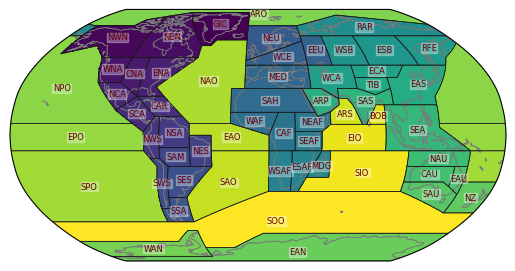

In [2]:
# Plot IPCC WGI AR6 reference regions
# See documentation at https://github.com/SantanderMetGroup/ATLAS/blob/main/notebooks/reference-regions_Python.ipynb
# See region names at: https://essd.copernicus.org/articles/12/2959/2020/essd-12-2959-2020-f01-web.png

# Load reference regions
ar6_all = regionmask.defined_regions.ar6.all

# Init plot
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))
text_kws = dict(color="#67000d", fontsize=6, bbox=dict(pad=0.2, color="w", alpha=0.3)) # style guide for text

ax = ar6_all.plot(
    ax=ax,
    add_ocean=True,
    label="abbrev",
    line_kws=dict(linewidth=0.5),
    text_kws=text_kws,
)
ax.coastlines(color="0.5", lw=0.5)

lon = np.arange(-179.5, 180)
lat = np.arange(-89.5, 90)
mask = regionmask.defined_regions.ar6.all.mask(lon, lat)
mask.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)

print('All regions:')
[print(i, region.abbrev, region.name) for i, region in enumerate(regionmask.defined_regions.ar6.all)]
plt.show()

plt.close()

In [4]:
#@title code: load ClimateBench data
from emcli2.dataset.climatebench import load_climatebench_data

#repo_root = '../'
#data_root = '../../../data/climate-emulator-presubmission-tst/data/'

# Uncomment these on MIT svante computer
repo_root = '../../climate-emulator-tutorial/' 
data_root = repo_root + 'data/'

data_path = data_root + 'raw/climatebench/' # climatebench data + '/'
len_historical = 165
scenarios_test = ['ssp245']

X_test, Y_test = load_climatebench_data(
  simus=scenarios_test, 
  len_historical=len_historical, 
  data_path=data_path,
  avg_over_ensemble=True)

Frozen({'time': 251, 'longitude': 144, 'latitude': 96}) ssp245


In [5]:
# Retrieve MPI-ESM1.2-LR data

from emcli2.dataset.mpi_esm1_2_lr import get_meta
from emcli2.dataset.mpi_esm1_2_lr import get_filepaths_mpi_esm1_2_lr
from emcli2.dataset.mpi_esm1_2_lr import create_train_splits
from emcli2.dataset.mpi_esm1_2_lr import load_mpi_data_as_xr

##############
# Change data variable here to repeat plot for tas
data_var = 'pr'
#
##############

#repo_root = '../'
#data_root = '../../../data/climate-emulator-presubmission-tst/data/'
# Uncomment these on MIT svante computer
data_root = '/d3/lutjens/bc3/data/'
data_path = data_root + 'raw/CMIP6/MPI-ESM1-2-LR/' # raw data downloaded from CMIPX
data_path_interim = data_root + 'interim/CMIP6/MPI-ESM1-2-LR/' # interim data, such as, statistical summaries
meta = get_meta(data_path=data_path, data_path_interim=data_path_interim)
# Load MPI-ESM1-2-LR target climate variable data

scenarios_train = ['historical']#, 'ssp126','ssp370','ssp585'] # 1pctCO2, picontrol, hist-aer, hist-GHG, abrupt-4xCO2
scenarios_aux = [] # auxiliary scenarios that are not used for train or test, e.g., 1pctCO2, picontrol, hist-aer, hist-GHG, abrupt-4xCO2
scenarios_test = ['ssp245']

# Load precomputed ensemble summaries for runtime increase.
scenarios = scenarios_train + scenarios_test + scenarios_aux
df = get_filepaths_mpi_esm1_2_lr(data_vars=[data_var],
        scenarios=scenarios,
        data_path=data_path_interim,
        filename_wildcard='ensemble_summaries_yr.nc',
        frequencies=[meta[data_var]['frequency']],
        verbose=False)

datasets, climatology = load_mpi_data_as_xr(df=df, meta=meta,
                    climatology=None,
                    m_member_subset=None,
                    open_data_parallel=False)
climatology.load();

#from emcli2.utils.plotting import plot_climatology_map
#plot_climatology_map(climatology,
#    data_var=data_var, 
#    unit=meta[data_var]['unit'],
#    filepath_to_save=f'{repo_root}/docs/figures/mpi-esm1-2-lr/{data_var}/{data_var}_climatology.png',
#    dpi=100);

_, Y_test_mpi, _ = create_train_splits(datasets, data_var=data_var,
                                            scenarios_train=scenarios_train,
                                            scenarios_test=scenarios_test,
                                            scenarios_aux=scenarios_aux,
                                            verbose=True)

If next line throws segmentation fault, try changing config.open_data_parallel to False.
[########################################] | 100% Completed | 1.43 sms


In [6]:
from pathlib import Path

def plot_regional_var(tas_locals, tas_globals=None, region_names=['Greenland/Iceland'],data_names=None,labels=None,filepath_to_save=None,tas_locals_shaded=None):

    # Get region information from IPCC AR6 regions
    ar6_all = regionmask.defined_regions.ar6.all
    region = ar6_all[region_names]
    region_idxs = list(region.regions.keys())

    # Initalize figure
    n_cols = len(tas_locals)+1
    n_rows = len(region_idxs)
    fig, axs = plt.subplots(n_rows, n_cols,figsize=(n_cols*3,n_rows*3), dpi=250) # , 
    if n_cols == 1:
        axs = axs[:,None]
    if n_rows == 1:
        axs = axs[None,:]
    
    for col_id, tas_local in enumerate(tas_locals):
        # Create global weighted average
        tas_local = tas_local.rename({'longitude': 'lon','latitude': 'lat'}) # regionmask assumes lat,lon keys
        weights = np.cos(np.deg2rad(tas_local.lat))
        if tas_globals is None:
            tas_global = tas_local.weighted(weights).mean(dim=("lat", "lon"))
        else:
            tas_global = tas_globals[col_id]

        # Create regional weighted average
        mask_3D = ar6_all.mask_3D(tas_local) # mask with region information
        tas_regional = tas_local.weighted(mask_3D * weights).mean(dim=("lat", "lon"))
        
        if tas_regional.time.dtype == np.dtype('datetime64[ns]'):
            years = tas_regional.time.dt.year
            years_global = tas_global.time.dt.year
        else:
            years = tas_regional.time
            years_global = tas_global.time

        # Process shaded regional averages        
        if tas_locals_shaded is not None:
            tas_local_shaded = tas_locals_shaded[col_id].rename({'longitude': 'lon','latitude': 'lat'})
            tas_regional_shaded = tas_local_shaded.weighted(mask_3D * weights).mean(dim=("lat", "lon"))
            if tas_regional_shaded.time.dtype == np.dtype('datetime64[ns]'):
                years_shaded = tas_regional_shaded.time.dt.year
            else:
                years_shaded = tas_regional_shaded.time
            
        for row_id, region_idx in enumerate(region_idxs):
            main_label = f'{ar6_all[region_idx].name}'
            if tas_locals_shaded is not None:
                regional_tas_label = main_label
            else:                
                regional_tas_label = f'21-yr avg.'

            # Plot regional tas
            axs[row_id,col_id].plot(years, tas_regional.sel(region=region_idx), label=f'{ar6_all[region_idx].name}', color=labels['color'],linewidth=1.0)
            # Plot global tas
            axs[row_id,col_id].plot(years_global, tas_global, label='Global', color='black',linewidth=1.0)

            # Plot shaded area for regional tas, e.g., for annual data
            if tas_locals_shaded is not None:
                axs[row_id,col_id].plot(years_shaded, tas_regional_shaded.sel(region=region_idx), label=main_label, color=labels['color'], alpha=0.3,linewidth=1.0)

            #if row_id > 0: # Disable y-axis ticks
            #    axs[row_id].get_yaxis().set_visible(False)
            if row_id == 0 and data_names is not None:
                axs[row_id,col_id].set_title(f'{data_names[col_id]}')
            if row_id == len(region_idxs)-1:
                axs[row_id,col_id].set_xlabel("Time in years")
            if col_id == 0:
                if labels is not None:
                    axs[row_id,col_id].set_ylabel(labels['ylabel'])
                else:
                    axs[row_id,col_id].set_ylabel("Surface temperature anom. \n wrt. piControl in °C")
            if col_id == labels['legend_col_id']:
                axs[row_id,col_id].legend()
            axs[row_id,col_id].set_ylim(labels['ylim'])

    for row_id, region_idx in enumerate(region_idxs):
        mask = ar6_all.mask(tas_local)
        tas_regional_tst = tas_local.where(mask.cf == ar6_all[region_idx].abbrev)
        tas_regional_tst = tas_regional_tst.sel(time = slice('2080', '2100')).mean(dim='time',keep_attrs=True)
        tas_regional_tst = tas_regional_tst.where(tas_regional_tst.isnull(), 1., 0.)

        # choose a projection
        proj = ccrs.Robinson()
        last_ax = plt.subplot2grid((n_rows,n_cols), (row_id,2), projection=proj)
        #last_ax = plt.subplot(int(f'{n_rows}{n_cols}{n_cols*(row_id+1)}'), projection=proj)
        #ax = plt.subplot(111, projection=proj)
        last_ax.set_global()

        tas_regional_tst.plot.pcolormesh(
            ax=last_ax, x="lon", y="lat", 
            transform=ccrs.PlateCarree(),
            add_colorbar=False,
            cmap=labels['cmap']
        )
        last_ax.set_title(f'{ar6_all[region_idx].name}')
        last_ax.coastlines(linewidth=0.2);
    
    # fig.suptitle(f'{labels["title"]}, ssp245', y=1.)
    
    plt.tight_layout()
    if filepath_to_save is not None:
        Path(filepath_to_save).parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(filepath_to_save)

    plt.show()
    plt.close()

In [7]:
from pprint import pprint
meta['tas']['title'] = 'Ensemble-mean surface temperature anomalies'
meta['tas']['ylabel'] = 'Annual ensemble-mean surface \n temp. anom. wrt. piControl in °C'
meta['tas']['ylim'] = (-1.1,4.3)
meta['tas']['cmap'] = 'gist_heat'
meta['tas']['color'] = 'brown'
meta['tas']['legend_col_id'] = 0
meta['pr']['title'] = 'Ensemble-mean precipitation anomalies'
meta['pr']['ylabel'] = 'Annual ensemble-mean precip. \n anom. wrt. piControl in mm/day'
meta['pr']['ylim'] = (-0.8,0.8)
meta['pr']['cmap'] = 'Blues'
meta['pr']['color'] = 'tab:blue'
meta['pr']['legend_col_id'] = 1
labels = meta[data_var]
pprint(labels)

{'cmap': 'Blues',
 'color': 'tab:blue',
 'data_path_piControl': '/d3/lutjens/bc3/data/raw/CMIP6/MPI-ESM1-2-LR/',
 'frequency': 'mon',
 'legend_col_id': 1,
 'title': 'Ensemble-mean precipitation anomalies',
 'unit': 'mm/day',
 'ylabel': 'Annual ensemble-mean precip. \n anom. wrt. piControl in mm/day',
 'ylim': (-0.8, 0.8)}


In [8]:
scenario_id = 0 # 0 + Y_test: ssp245; 1 + Y_train: ssp370
weights = np.cos(np.deg2rad(Y_test[scenario_id][data_var].latitude))
tas_global = Y_test[scenario_id][data_var].weighted(weights).mean(dim=("latitude", "longitude"))
weights_mpi = np.cos(np.deg2rad(Y_test_mpi[scenario_id][data_var].latitude))
tas_global_mpi = Y_test_mpi[scenario_id][data_var].weighted(weights_mpi).mean(dim=("latitude", "longitude"))
tas_globals = [tas_global, tas_global_mpi]

/tmp/ipykernel_3423383/3046113312.py:81: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  last_ax = plt.subplot2grid((n_rows,n_cols), (row_id,2), projection=proj)


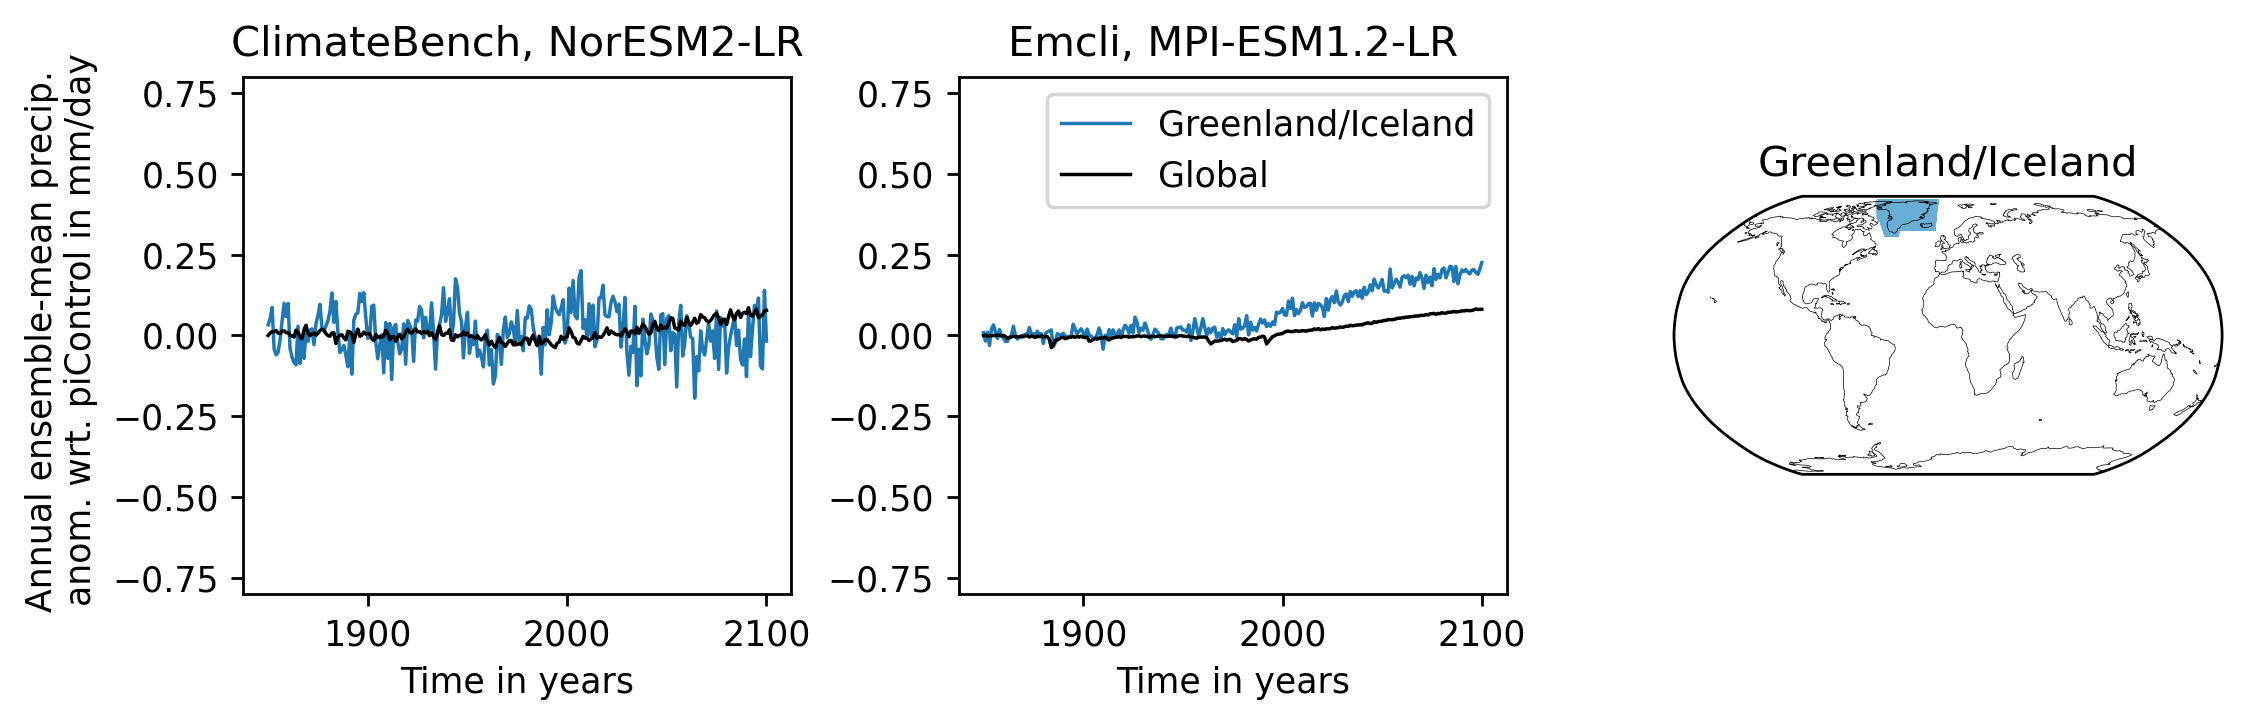

In [9]:
# Retrieve data 
#region_names = ['S.Central-America']
#filename = 'scentral-america.png'

region_names = ['Greenland/Iceland']
filename = 'greenland.png'

# region_names = np.random.choice(regionmask.defined_regions.ar6.all.names,2)# ['Greenland/Iceland','N.E.North-America']
# region_names = ['Greenland/Iceland', 'N.Europe', 'S.South-America', 'S.Eastern-Africa', 'W.Antarctica']

# Plot the regional data as annual averages
tas_locals = [Y_test[scenario_id][data_var],Y_test_mpi[scenario_id][data_var]]
filename = 'regional_annual_avg_' + filename

data_names = ['ClimateBench, NorESM2-LR', 'Emcli, MPI-ESM1.2-LR']
filepath_to_save = repo_root + f'docs/figures/mpi-esm1-2-lr/{data_var}/internal_variability/{filename}'

plot_regional_var(tas_locals=tas_locals, tas_globals=tas_globals,region_names=region_names, data_names=data_names,labels=labels,filepath_to_save=filepath_to_save)

/tmp/ipykernel_3423383/3046113312.py:81: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  last_ax = plt.subplot2grid((n_rows,n_cols), (row_id,2), projection=proj)


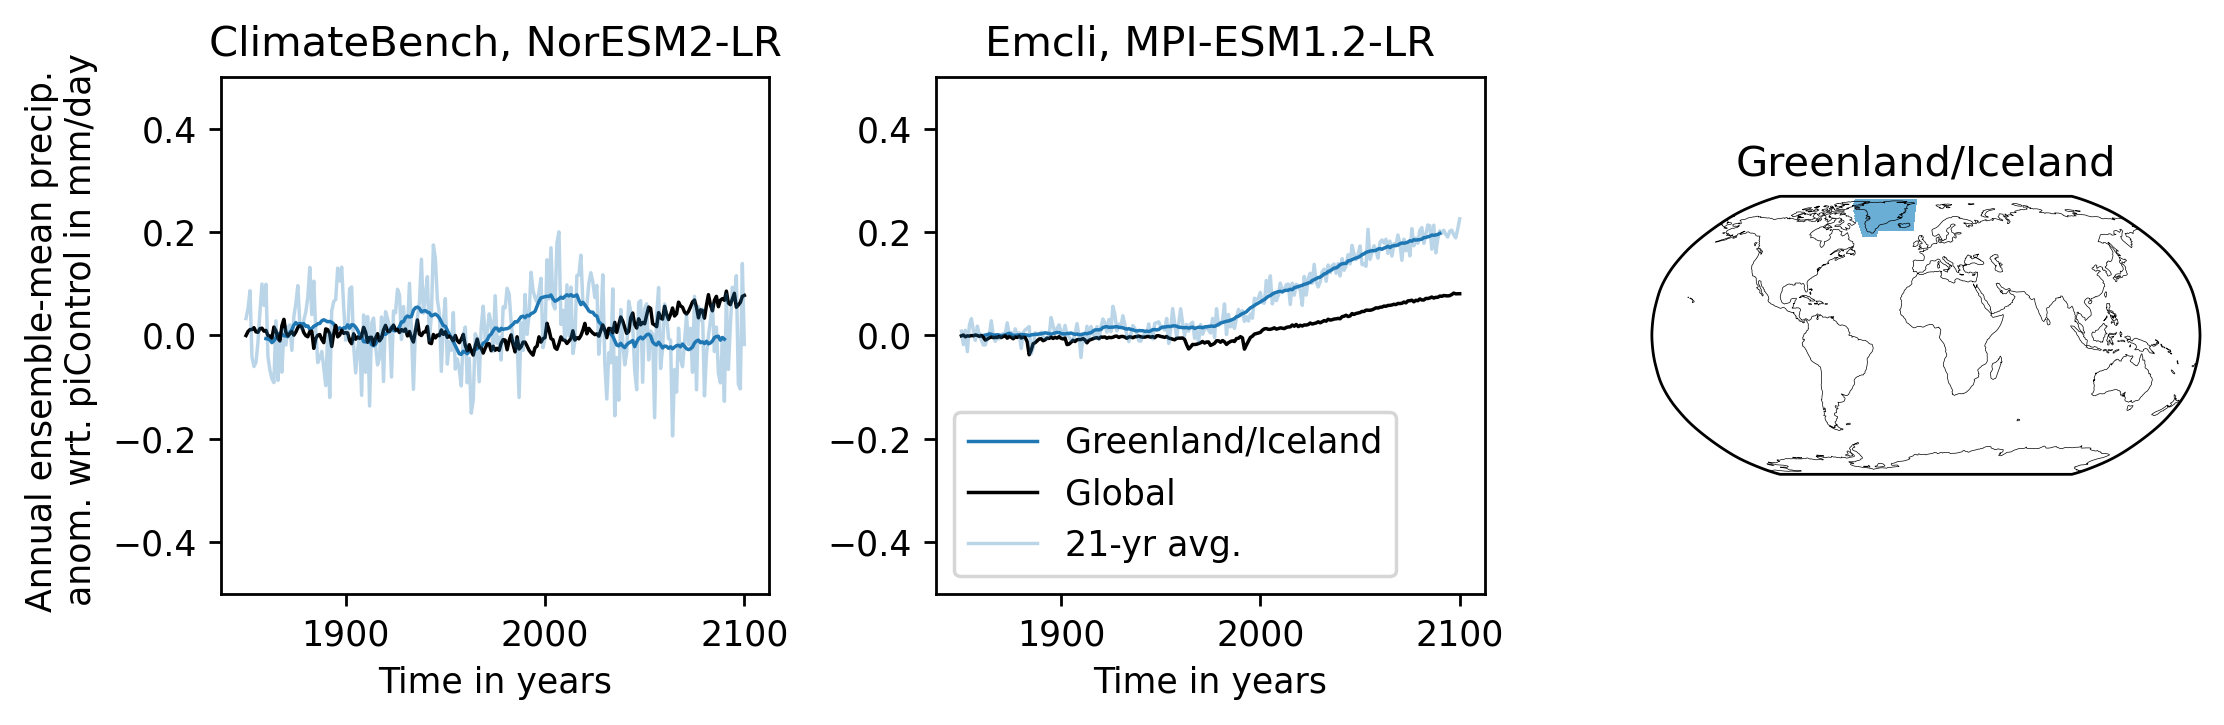

In [11]:
# Repeat the plot for 21-year averaged data and many regions:

meta['tas']['ylim'] = (-1.1,4.3)
meta['pr']['ylim'] = (-0.5,0.5)

region_names = ['Greenland/Iceland']
filename = 'greenland.png'

# region_names = ['Greenland/Iceland', 'Russian-Arctic', 'E.North-America', 'S.Central-America','S.South-America','N.South-America','S.Eastern-Africa','N.Europe','Sahara','E.Asia', 'S.E.Asia', 'W.Antarctica','Equatorial.Pacific-Ocean','Southern-Ocean']
#region_names = ['Greenland/Iceland', 'Russian-Arctic', 'E.North-America', 'S.Central-America','N.Europe','Sahara','E.Asia', 'S.E.Asia', 'W.Antarctica','Equatorial.Pacific-Ocean','Southern-Ocean']
#filename = 'selected_regions.png'

# region_names = regionmask.defined_regions.ar6.all.names
# filename = 'all_regions.png'

tas_locals = [Y_test[scenario_id][data_var],Y_test_mpi[scenario_id][data_var]]
tas_locals_21yr_avg = [Y_test[scenario_id][data_var].rolling(time=21, center=True).mean().dropna('time'), Y_test_mpi[scenario_id][data_var].rolling(time=21, center=True).mean().dropna('time')]
filename = 'regional_21yr_avg_' + filename

filepath_to_save = repo_root + f'docs/figures/mpi-esm1-2-lr/{data_var}/internal_variability/{filename}'
plot_regional_var(tas_locals=tas_locals_21yr_avg, tas_globals=tas_globals,region_names=region_names, data_names=data_names,labels=labels,filepath_to_save=filepath_to_save,tas_locals_shaded=tas_locals)